In [75]:
import pandas as pd

df = pd.read_csv('../data/income-restricted-inventory-2021.csv', dtype={'Zip Code':str})
df

,Unnamed: 0,Project Name,Neighborhood,Zip Code,TtlProjUnits,RentUnits,OwnUnits,TtlMarket,MarketRent,MarketOwn,Total Income-Restricted,Income-Restricted Rental,Income-Restricted Ownership,Tenure,Public/ Private,Includes Senior Units?,Section 8
0,0,Abbot Street/ Shawmut Ave,Roxbury,02119,16,16,0,0.0,0.0,0.0,16,16,0.0,Rental,Private,NaN,NaN
1,1,Academy Homes I,Roxbury,02119,202,202,0,52.0,52.0,0.0,150,150,0.0,Rental,Private,NaN,NaN
2,2,Academy Homes II,Roxbury,02119,236,236,0,0.0,0.0,0.0,236,236,0.0,Rental,Private,NaN,Y
3,3,Adams Court Phase A,Mattapan,02126,50,50,0,0.0,0.0,0.0,50,50,0.0,Rental,Private,NaN,NaN
4,4,Adams Court Phase B,Mattapan,02126,45,45,0,0.0,0.0,0.0,45,45,0.0,Rental,Private,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440,1440,xxxxxxxx Blue Hill Ave,Roxbury,02119,4,4,0,0.0,0.0,0.0,4,4,0.0,Rental,Private,NaN,NaN
1441,1441,YouthBuild Ruskindale Rd,Hyde Park,02136,1,0,1,0.0,0.0,0.0,1,0,1.0,Ownership,Private,NaN,NaN
1442,1442,YWCA Berkeley,South End,02116,208,208,0,168.0,168.0,0.0,40,40,0.0,Rental,Private,NaN,NaN
1443,1443,YWCA Boston Units,Back Bay,02116,115,115,0,36.0,36.0,0.0,79,79,0.0,Rental,Private,?,NaN


In [1]:
import pandas as pd
import time
from functools import reduce
from geopy.geocoders import Nominatim

In [2]:
# setup geopy
geolocator = Nominatim(user_agent="preprocessing_noncomm")

In [3]:
def find_coordinates(df_row):
    addr = df_row['Unnamed: 0']+' '+ df_row['Project Name']+ ' ' + df_row['Zip Code']
    
    time.sleep(0.1)
    try:
        location = geolocator.geocode(addr)
    except Exception as e:
        print("Error", e, "while getting", addr)
        return (pd.NA, pd.NA)
    
    if location == None:
        print("No location for", addr)
        return (pd.NA, pd.NA)
    else:
        print("Found location for", addr)
        return (location.latitude, location.longitude)

def fix_zip(zip):
    if len(zip) == 4:
        return '0' + zip
    else:
        return zip

In [4]:
# add coordinates to main dataset using geopy
df = pd.read_csv('../data/income-restricted-non-commercial.csv')
df['Unnamed: 0'] = df['Unnamed: 0'].astype(str)
df['Zip Code'] = df['Zip Code'].astype(str).apply(fix_zip)
df['coordinates'] = df.apply(find_coordinates, axis=1)
df.to_csv('../data/preprocessed_noncomm.csv')

No location for 10 Alleyne (VUP) CDFI 02121
No location for 18 Andrade (VUP) 02122
Found location for 19 Andrew Square Apts 02127
No location for 41 Bailey (VUP) 02121
No location for 45 Baptista (VUP) 02125
No location for 50 Basilica (667-6) 02129
No location for 54 Bay Cove Group Homes IV 02125
No location for 58 Beasley (VUP) 02121
No location for 65 BHA Infill 2 - Urban Edge 02119
No location for 66 BHA Infill 3 - Nuestra 02119
Found location for 76 Bird St. Estates 02125
Found location for 83 Blue Hill Commons 02119
No location for 94 Bowdoin Geneva Phase III (HOME AGAIN) 02122
No location for 98 Bowdoin/Geneva (Phase II) 02125
No location for 99 Bowdoin-Geneva & Dudley FTHB 02125
No location for 100 Bowdoin-Geneva & Dudley Rental 02119
No location for 101 Bowen (VUP) 02124
No location for 105 Bradlee-Fowler 02124
No location for 108 Brantley (VUP) 02126
No location for 109 Braxton (VUP) 02121
No location for 117 Brookford, Dalin and Dean St. Homes (Julian Phase 2 HOME AGAIN) 021

In [5]:
# import all the libraries
import pandas as pd
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
# read in dataset
noncomm_df = pd.read_csv('../data/preprocessed_noncomm.csv')

In [9]:
import io
from PIL import Image

In [13]:
# clean up the dataset to plot coordinates
noncomm_df = noncomm_df.replace(to_replace=['\(', '\)'], value="", regex=True)
noncomm_df = noncomm_df[noncomm_df["coordinates"].str.contains('<NA>') == False]
noncomm_df[['Latitude', 'Longitude']] = noncomm_df["coordinates"].str.split(",", expand=True).astype(float)

# plot the map using latitude and longitude
map = folium.Map(location=[noncomm_df.iloc[0].Latitude, noncomm_df.iloc[0].Longitude])
for i in range(0,len(noncomm_df)):
    folium.CircleMarker(
      location=[noncomm_df.iloc[i]['Latitude'], noncomm_df.iloc[i]['Longitude']], radius=2,
      color = 'blue'
   ).add_to(map)
map

plot a bar chart by zip code

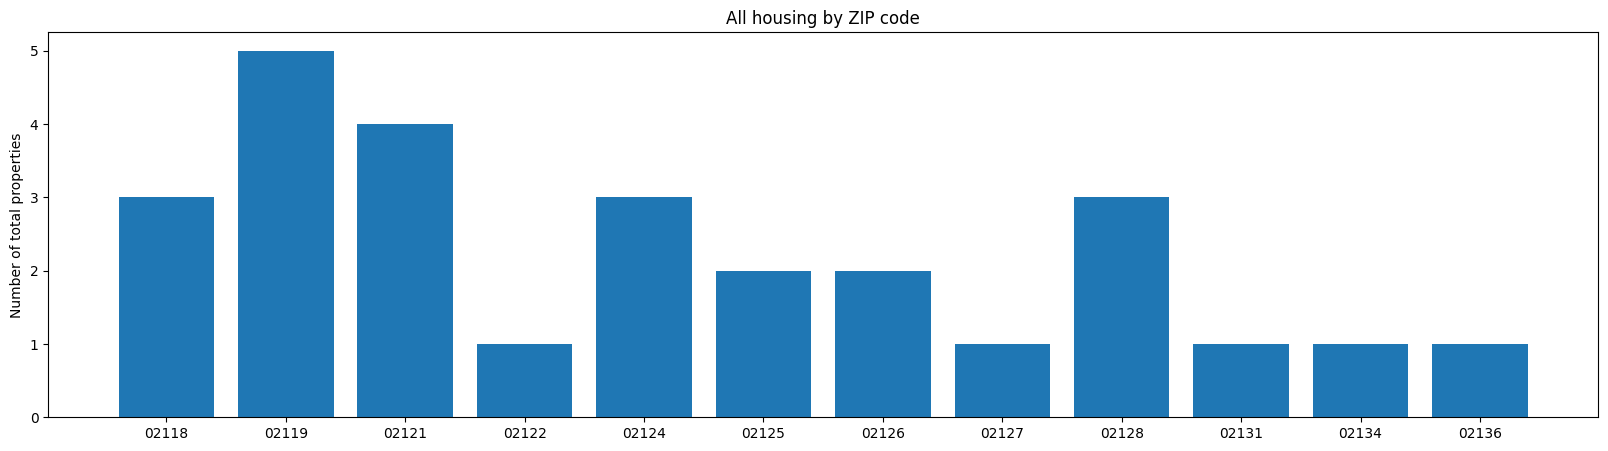

In [7]:
fig, ax = plt.subplots(figsize=(20, 5))

zips = noncomm_df['Zip Code'].astype(str).groupby(noncomm_df['Zip Code'].astype(str)).count()
labels = [fix_zip(z) for z in zips.keys()]

ax.bar(labels, zips)
ax.set_ylabel("Number of total properties")
ax.set_title("All housing by ZIP code")

plt.show()

read csv

In [8]:
df = pd.read_csv('../data/preprocessed_noncomm.csv', dtype={'Zip Code':str})
df

,Unnamed: 0.1,Unnamed: 0,Project Name,Neighborhood,Zip Code,TtlProjUnits,RentUnits,OwnUnits,TtlMarket,MarketRent,MarketOwn,Total Income-Restricted,Income-Restricted Rental,Income-Restricted Ownership,Tenure,Public/ Private,Includes Senior Units?,Section 8,coordinates
0,0,10,Alleyne (VUP) CDFI,Roxbury,02121,3,2,1,1.0,0.0,1.0,2,2,0.0,Ownership/Rental,Private,NaN,NaN,"(<NA>, <NA>)"
1,1,18,Andrade (VUP),Dorchester,02122,3,2,1,1.0,0.0,1.0,2,2,0.0,Ownership/Rental,Private,NaN,NaN,"(<NA>, <NA>)"
2,2,19,Andrew Square Apts,South Boston,02127,9,9,0,0.0,0.0,0.0,9,9,0.0,Rental,Private,NaN,NaN,"(35.2802289, -81.5469111)"
3,3,41,Bailey (VUP),Roxbury,02121,1,1,0,0.0,0.0,0.0,1,1,0.0,Rental,Private,NaN,NaN,"(<NA>, <NA>)"
4,4,45,Baptista (VUP),Dorchester,02125,1,1,0,0.0,0.0,0.0,1,1,0.0,Rental,Private,NaN,NaN,"(<NA>, <NA>)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,398,1434,xxxxx Clarkson St (REO),Dorchester,02125,3,2,1,1.0,0.0,1.0,2,2,0.0,Ownership/Rental,Private,NaN,NaN,"(<NA>, <NA>)"
399,399,1437,xxxxxx Washington St,Dorchester,02124,2,2,0,0.0,0.0,0.0,2,2,0.0,Rental,Private,NaN,NaN,"(<NA>, <NA>)"
400,400,1439,xxxxxxx Blue Hill Ave,Roxbury,02119,10,10,0,0.0,0.0,0.0,10,10,0.0,Rental,Public,NaN,NaN,"(<NA>, <NA>)"
401,401,1440,xxxxxxxx Blue Hill Ave,Roxbury,02119,4,4,0,0.0,0.0,0.0,4,4,0.0,Rental,Private,NaN,NaN,"(<NA>, <NA>)"
